# Lista de Exercícios 06 – Raízes de Equações – Newton-Raphson

## 1 - Utilize o método de Newton-Raphson para encontre a raiz aproximada das seguintes equações. Considere os seguintes pontos:
- Precisão de 6 casas decimais;
- Número máximo de 50 iterações e $\epsilon < 10^{-5}$;
- Isole o intervalo da raiz;
- Analise a convergência do método;
- Apresente o código, solução e passo a passo para chegar nas respostas.

In [73]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as pyplot
from IPython.display import Math
#from newton_raphson import newton_raphson
TOLERANCIA=10e-5
ITERACOES=50
def plot(fx, intervalo):
    xx = np.linspace(intervalo[0], intervalo[1])
    pyplot.plot(xx, fx(xx), label='f(x)')
    pyplot.grid()
    pyplot.show()

def plot3(fx_, intervalo):
    x_ = sy.Symbol('x')
    flx_ = sy.diff(fx_, x_)
    fx = sy.lambdify(x_, fx_)
    flx = sy.lambdify(x_, flx_)
    f2lx_ = sy.diff(flx_, x_)
    f2lx = sy.lambdify(x_, f2lx_)
    xx = np.linspace(intervalo[0], intervalo[1])
    pyplot.plot(xx, fx(xx), label='f(x)')
    pyplot.plot(xx, flx(xx), label='f\'(x)')
    pyplot.plot(xx, f2lx(xx), label='f\'\'(x)')
    pyplot.legend()
    pyplot.grid()
    pyplot.show()

In [74]:
import pandas as pd

def newton_raphson(fx_,intervalo,tol=TOLERANCIA,n=ITERACOES):
    flx_=sy.diff(fx_)
    sym_x=sy.Symbol('x')
    flx=sy.lambdify(sym_x,flx_)
    fx=sy.lambdify(sym_x,fx_)
    x = (intervalo[0] + intervalo[1]) /2
    xant=float('nan')
    dados=pd.DataFrame()
    for i in range(n):
        val_fx=fx(x)
        error=abs((x-xant)/max(x,1))
        
        dados_atual=pd.DataFrame({'erro':[error], 'x':[x],'f(x)':[val_fx]})
        dados=pd.concat([dados,dados_atual], ignore_index=True)
        if (val_fx==0) or (error<tol):
            break
        xant = x
        x=x-val_fx/flx(x)
    return x, dados

### a) $f(x) = x \sin{(x² + 1)}$

<IPython.core.display.Math object>

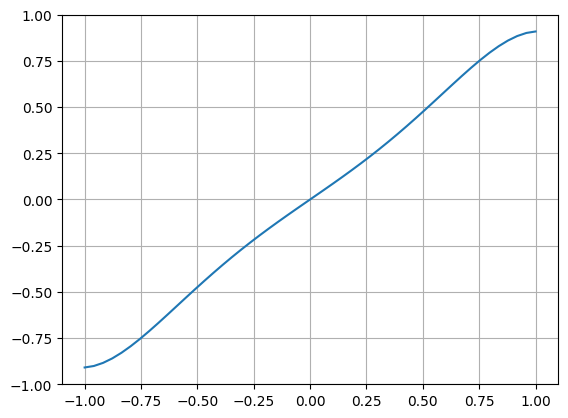

In [75]:
# Definição do intervalo
x = sy.Symbol('x')
fx_ = x * sy.sin(x**2+1)
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
#plot(fx, [-10, 10])
plot(fx, [-1, 1])

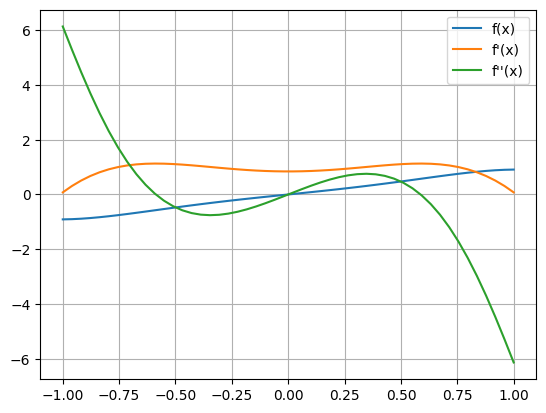

In [76]:
intervalo = [-1, 1]
plot3(fx_, intervalo)

In [77]:
# Teste de convergência

# 1) f(x) é contínua com raiz no intervalo [a, b] Sim
# 2) f'(x) != 0 para todo x em [a, b] Sim
# 3) f''(x) não muda de sinal em [a, b] Não
# Não passa pelo teste de convergência, mas vamos executar o método
raiz, iteracoes = newton_raphson(fx_, intervalo)
display(iteracoes)

,erro,x,f(x)
0,NaN,0.0,0.0


In [78]:
print('Raiz:', raiz)
# Mesmo nao passando pelo teste de convergencia o metodo convergiu para a raiz de uma vez porque estava no centro

Raiz: 0.0


### b) $f(x) = e^{\sin{(x)}} - 1$

<IPython.core.display.Math object>

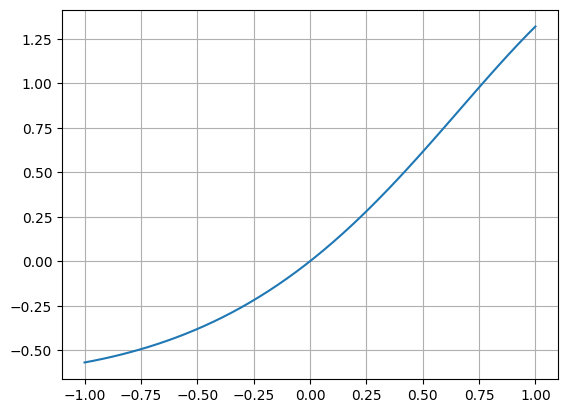

In [79]:
# Definição do intervalo
x = sy.Symbol('x')
fx_ = sy.exp(sy.sin(x)) - 1
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
plot(fx, [-1, 1])

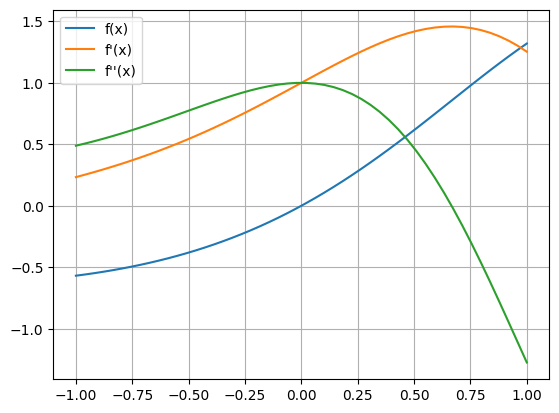

In [80]:
intervalo = [-1, 1]
plot3(fx_, intervalo)

In [81]:
# Teste de convergência

# 1) f(x) é contínua com raiz no intervalo [a, b] Sim
# 2) f'(x) != 0 para todo x em [a, b] Sim
# 3) f''(x) não muda de sinal em [a, b] Não
# Não passa pelo teste de convergência, mas vamos executar o método
raiz, iteracoes = newton_raphson(fx_, intervalo)
display(iteracoes)

,erro,x,f(x)
0,NaN,0.0,0.0


In [82]:
print('Raiz:', raiz)
#Mesmo nao passando pelo teste de convergencia o metodo convergiu para a raiz de uma vez porque estava no centro

Raiz: 0.0


### c) $f(x) = 2x^4 - 15x^3 + x - 1$

<IPython.core.display.Math object>

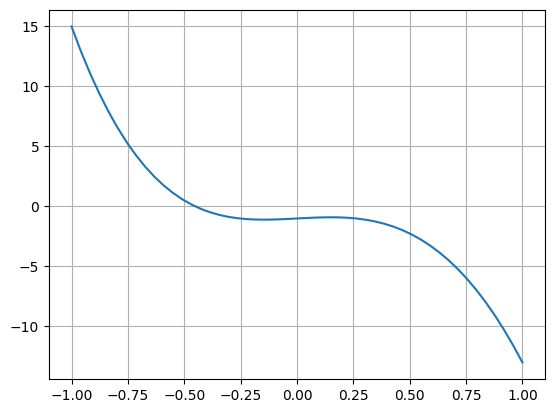

In [83]:
# Definição do intervalo
fx_ = 2*x**4 - 15*x**3 + x -1
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
plot(fx, [-1, 1])


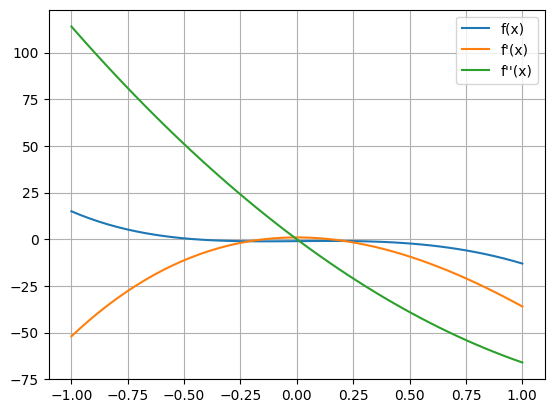

In [84]:
intervalo = [-1, 1]
plot3(fx_, intervalo)

In [85]:
# Teste de convergência

# 1) f(x) é contínua com raiz no intervalo [a, b] Sim
# 2) f'(x) != 0 para todo x em [a, b] Não
# 3) f''(x) não muda de sinal em [a, b] Não

# Passou pelo teste de convergência, vamos executar o método
raiz, iteracoes = newton_raphson(fx_, intervalo, 10e-5, 50)
display(iteracoes)

,erro,x,f(x)
0,NaN,0.000000,-1.000000e+00
1,1.000000,1.000000,-1.300000e+01
2,0.361111,0.638889,-3.939606e+00
3,0.257797,0.381092,-1.406919e+00
4,0.276266,0.104826,-9.122109e-01
5,0.944153,1.877014,-7.349332e+01
6,0.597920,1.174661,-2.032996e+01
7,0.422435,0.752226,-5.992060e+00
8,0.284552,0.467674,-1.970988e+00
9,0.245635,0.222039,-9.373017e-01


In [86]:
print('Raiz:', raiz)
# O método convergiu para a raiz mesmo nao passando pelos testes

Raiz: -0.4501257895008998


### e) $f(x) = \dfrac{(2x^3 - 10x) \cos(x)}{x^2 - 5}$

<IPython.core.display.Math object>

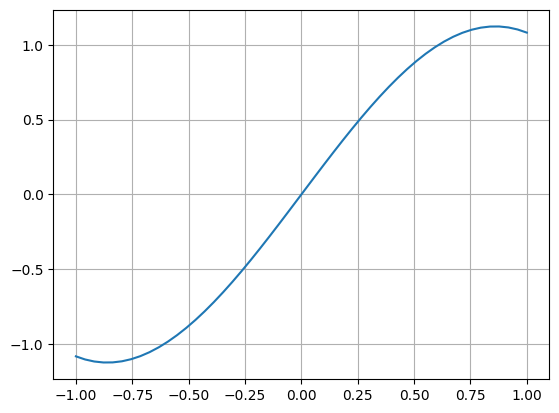

In [87]:
# Definição do intervalo
fx_ = (2*x**3 - 10*x)*sy.cos(x) / (x**2 - 5)
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
plot(fx, [-1, 1])

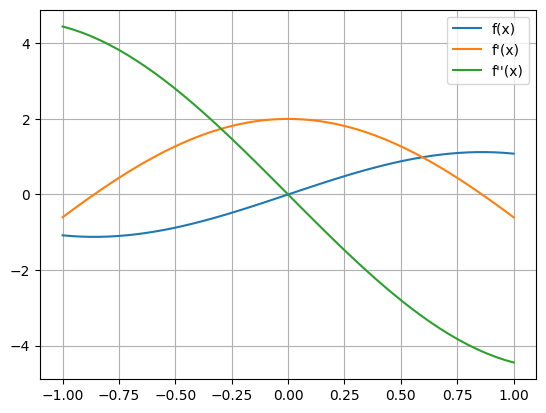

In [88]:
intervalo = [-1, 1]
plot3(fx_, intervalo)

In [89]:
# Teste de convergência

# 1) f(x) é contínua com raiz no intervalo [a, b] Sim
# 2) f'(x) != 0 para todo x em [a, b] Não
# 3) f''(x) não muda de sinal em [a, b] Não

# Não passa pelo teste de convergência, mas vamos executar o método
raiz, iteracoes = newton_raphson(fx_, intervalo)
display(iteracoes)

,erro,x,f(x)
0,NaN,0.0,-0.0


In [90]:
print('Raiz:', raiz)
# Mesmo nao passando pelo teste de convergencia o metodo convergiu para a raiz de uma vez porque estava no centro

Raiz: 0.0


### e) $f(x) = x⁶ - 7x^4 + 6x^2 - 1$

<IPython.core.display.Math object>

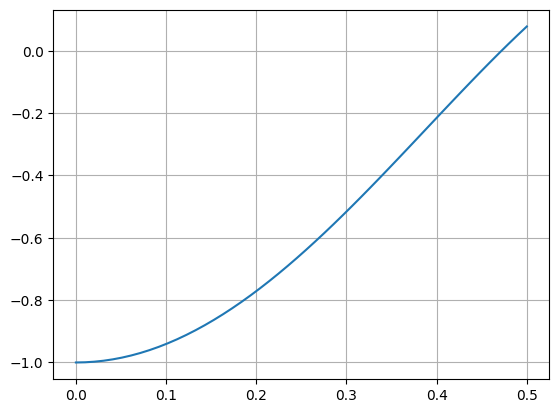

In [91]:
# Definição do intervalo
fx_ = x**6 - 7 *x**4 + 6*x**2 -1
display(Math('f(x) = ' + sy.latex(fx_)))
fx = sy.lambdify(x, fx_)
#plot(fx, [-100, 100])
#plot(fx, [-1, 1])
#plot(fx, [-10, 10])
#plot(fx, [-5, 5])
#plot(fx, [-2, 2])
plot(fx, [0, 0.5])


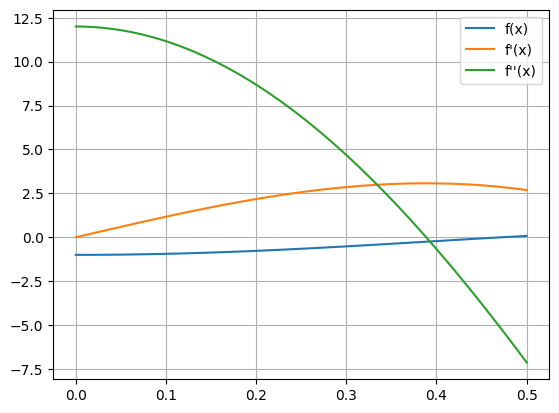

In [92]:
intervalo = [0, 0.5]
plot3(fx_, intervalo)

In [93]:
# Teste de convergência

# 1) f(x) é contínua com raiz no intervalo [a, b] Sim
# 2) f'(x) != 0 para todo x em [a, b]? Não
# 3) f''(x) não muda de sinal em [a, b] Não

# Não passa pelo teste de convergência, mas vamos executar o método
raiz, iteracoes = newton_raphson(fx_, intervalo, 10e-5, 50)
display(iteracoes)

,erro,x,f(x)
0,NaN,0.250000,-6.520996e-01
1,0.253897,0.503897,8.854430e-02
2,0.033297,0.470600,-3.676819e-03
3,0.001282,0.471882,-4.241946e-06
4,0.000001,0.471884,-5.734968e-12


In [ ]:
print('Raiz:', raiz)
# Mesmo nao passando pelo teste de convergencia o metodo convergiu para a raiz

Raiz: 0.47188379883767523
